Running Kruskal's algorithm with detailed debugging...

Sorted edges:
1. (g, h): 1
2. (c, i): 2
3. (f, g): 2
4. (a, b): 4
5. (c, f): 4
6. (g, i): 6
7. (c, d): 7
8. (h, i): 7
9. (a, h): 8
10. (b, c): 8
11. (d, e): 9
12. (e, f): 10
13. (b, h): 11
14. (d, f): 14

Execution of Kruskal's algorithm:
Added edge #1: (g, h) with weight 1
Current MST weight: 1
Added edge #2: (c, i) with weight 2
Current MST weight: 3
Added edge #3: (f, g) with weight 2
Current MST weight: 5
Added edge #4: (a, b) with weight 4
Current MST weight: 9
Added edge #5: (c, f) with weight 4
Current MST weight: 13
Skipped edge #6: (g, i) - would create a cycle
Added edge #7: (c, d) with weight 7
Current MST weight: 20
Skipped edge #8: (h, i) - would create a cycle
Added edge #9: (a, h) with weight 8
Current MST weight: 28
Skipped edge #10: (b, c) - would create a cycle
Added edge #11: (d, e) with weight 9
Current MST weight: 37
MST is complete with V-1 edges
MST verification passed: it is connected and acyclic

Edges in 

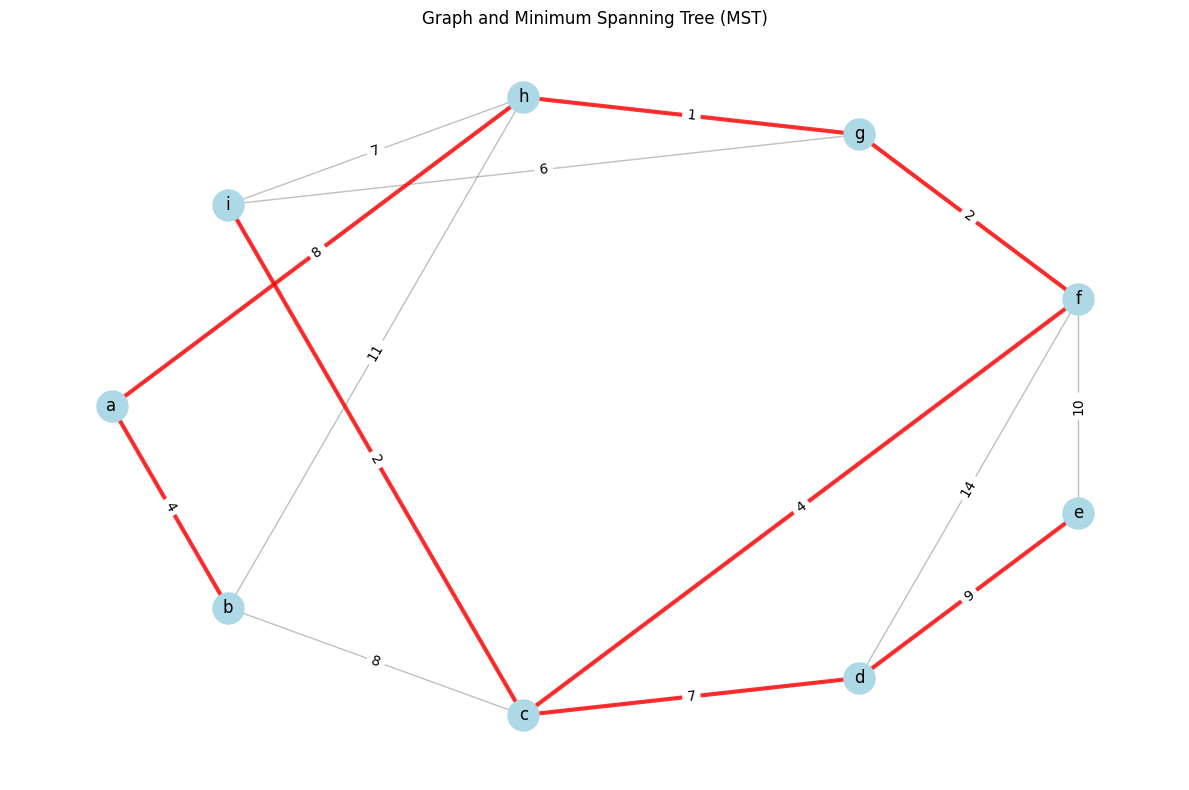

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

class DisjointSet:
    def __init__(self, vertices):
        """Initialize a disjoint set with each vertex as its own parent."""
        self.parent = {v: v for v in vertices}
        self.rank = {v: 0 for v in vertices}  # For union by rank optimization

    def find(self, item):
        """Find the root of the set containing the item with path compression."""
        if self.parent[item] != item:
            self.parent[item] = self.find(self.parent[item])  # Path compression
        return self.parent[item]

    def union(self, set1, set2):
        """Union two sets based on rank."""
        root1 = self.find(set1)
        root2 = self.find(set2)

        if root1 == root2:
            return False  # Already in the same set, no union performed

        # Union by rank
        if self.rank[root1] < self.rank[root2]:
            self.parent[root1] = root2
        elif self.rank[root1] > self.rank[root2]:
            self.parent[root2] = root1
        else:
            self.parent[root2] = root1
            self.rank[root1] += 1
        return True  # Union performed successfully

def kruskal(vertices, edges, debug=False):
    """
    Implementation of Kruskal's algorithm to find the Minimum Spanning Tree.

    Args:
        vertices: List of vertices in the graph
        edges: List of edges in the format (u, v, weight)
        debug: Whether to print debug information

    Returns:
        mst: List of edges in the Minimum Spanning Tree
        total_weight: Total weight of the MST
    """
    mst = []
    total_weight = 0
    disjoint_set = DisjointSet(vertices)

    # Sort edges by weight
    edges.sort(key=lambda x: x[2])

    if debug:
        print("\nSorted edges:")
        for i, (u, v, weight) in enumerate(edges):
            print(f"{i+1}. ({u}, {v}): {weight}")
        print("\nExecution of Kruskal's algorithm:")

    for i, (u, v, weight) in enumerate(edges):
        if disjoint_set.find(u) != disjoint_set.find(v):
            union_success = disjoint_set.union(u, v)
            if union_success:
                mst.append((u, v, weight))
                total_weight += weight
                if debug:
                    print(f"Added edge #{i+1}: ({u}, {v}) with weight {weight}")
                    print(f"Current MST weight: {total_weight}")

                # Stop if we have V-1 edges (MST is complete)
                if len(mst) == len(vertices) - 1:
                    if debug:
                        print("MST is complete with V-1 edges")
                    break
        elif debug:
            print(f"Skipped edge #{i+1}: ({u}, {v}) - would create a cycle")

    return mst, total_weight

def visualize_graph(vertices, edges, mst=None):
    """
    Visualize the graph and MST using NetworkX and Matplotlib.

    Args:
        vertices: List of vertices
        edges: List of edges in the format (u, v, weight)
        mst: List of MST edges in the format (u, v, weight)
    """
    G = nx.Graph()

    # Add nodes
    for v in vertices:
        G.add_node(v)

    # Add edges
    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight)

    # Create positions for nodes using a more predictable layout
    # Using shell_layout or circular_layout can give more consistent positioning
    pos = nx.shell_layout(G)

    plt.figure(figsize=(12, 8))

    # Draw all nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw all edges in gray
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in edges],
                           width=1, alpha=0.5, edge_color='gray')

    # Draw MST edges in red if provided
    if mst:
        mst_edges = [(u, v) for u, v, _ in mst]
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges,
                               width=3, alpha=0.8, edge_color='red')

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12)

    # Draw edge weights
    edge_labels = {(u, v): w for u, v, w in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.title("Graph and Minimum Spanning Tree (MST)")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("graph_mst.png", dpi=300)
    plt.show()

def find_path(mst, start, end):
    """
    Find a path from start to end in the MST using BFS.

    Args:
        mst: List of edges in the MST (u, v, weight)
        start: Starting vertex
        end: Ending vertex

    Returns:
        path: List of vertices forming the path, or None if no path exists
    """
    # Create a graph from MST edges
    G = nx.Graph()
    for u, v, _ in mst:
        G.add_edge(u, v)

    # Check if both vertices exist in the MST
    if start not in G or end not in G:
        print(f"Error: {start} or {end} not in MST")
        return None

    # Find shortest path using BFS
    try:
        path = nx.shortest_path(G, start, end)
        return path
    except nx.NetworkXNoPath:
        print(f"No path found from {start} to {end}")
        return None

def verify_mst(vertices, edges, mst):
    """
    Verify that the MST is valid (connected and minimum weight).

    Args:
        vertices: List of vertices
        edges: List of edges in the format (u, v, weight)
        mst: List of edges in the MST

    Returns:
        bool: True if valid, False otherwise
    """
    # Check if MST has V-1 edges
    if len(mst) != len(vertices) - 1:
        print(f"MST should have {len(vertices)-1} edges, but has {len(mst)}")
        return False

    # Check if MST is connected
    G = nx.Graph()
    for u, v, _ in mst:
        G.add_edge(u, v)

    if not nx.is_connected(G):
        print("MST is not connected")
        return False

    # Check if MST is acyclic
    if len(G.edges) != len(vertices) - 1:
        print("MST contains cycles")
        return False

    print("MST verification passed: it is connected and acyclic")
    return True

def main():
    # Define vertices and edges based on the image
    vertices = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
    edges = [
        ('a', 'b', 4), ('a', 'h', 8),
        ('b', 'h', 11), ('b', 'c', 8),
        ('c', 'd', 7), ('c', 'i', 2),
        ('c', 'f', 4), ('d', 'e', 9),
        ('d', 'f', 14), ('e', 'f', 10),
        ('f', 'g', 2), ('g', 'h', 1),
        ('g', 'i', 6), ('h', 'i', 7)
    ]

    # Run Kruskal's algorithm with debug information
    print("Running Kruskal's algorithm with detailed debugging...")
    mst, total_weight = kruskal(vertices, edges, debug=True)

    # Verify MST properties
    verify_mst(vertices, edges, mst)

    # Sort MST edges by weight, then node names
    mst.sort(key=lambda x: (x[2], min(x[0], x[1]), max(x[0], x[1])))

    # Print MST edges and total weight
    print("\nEdges in the Minimum Spanning Tree (sorted by weight and node names):")
    for u, v, weight in mst:
        print(f"{min(u, v)} - {max(u, v)}: {weight}")
    print(f"\nTotal weight of MST: {total_weight}")

    # Find path from 'a' to 'e'
    path = find_path(mst, 'a', 'e')
    if path:
        print(f"\nPath from 'a' to 'e' in MST: {' -> '.join(path)}")

        # Calculate path weight
        path_weight = 0
        for i in range(len(path)-1):
            for u, v, w in mst:
                if (u == path[i] and v == path[i+1]) or (v == path[i] and u == path[i+1]):
                    path_weight += w
                    break
        print(f"Total weight of path: {path_weight}")

    # Visualize the graph and MST
    visualize_graph(vertices, edges, mst)

if __name__ == "__main__":
    main()